In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [5]:
df = pd.read_csv(r"C:\Users\Kuki\Desktop\heart.csv",sep=",")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

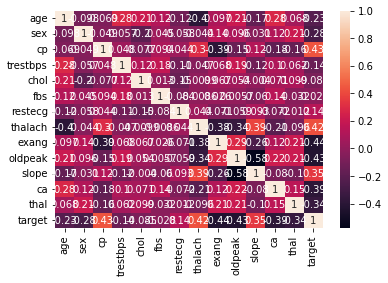

In [6]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

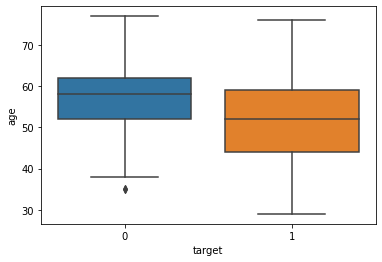

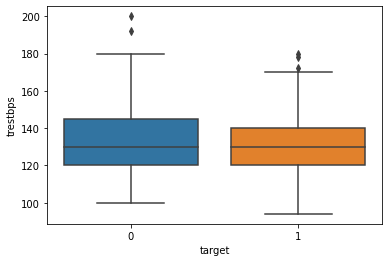

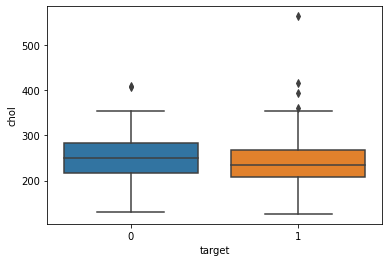

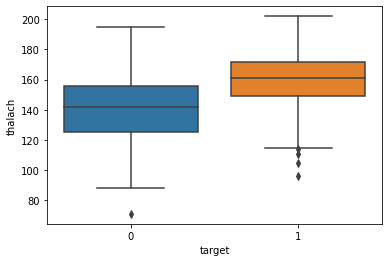

In [8]:
continuousColumns = ["age","trestbps","chol","thalach"]
for item  in continuousColumns:
    sns.boxplot(x="target", y=item, data=df)
    plt.show()

<AxesSubplot:title={'center':'trestbps'}, xlabel='trestbps', ylabel='Count'>

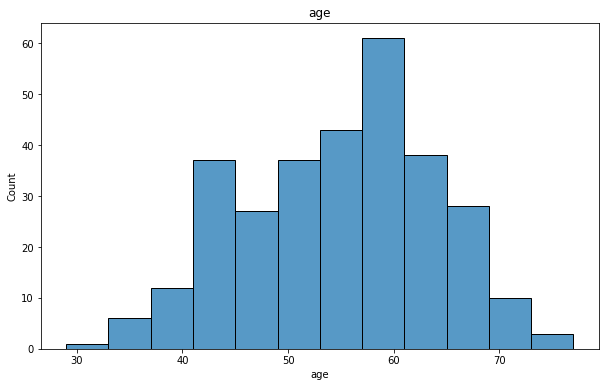

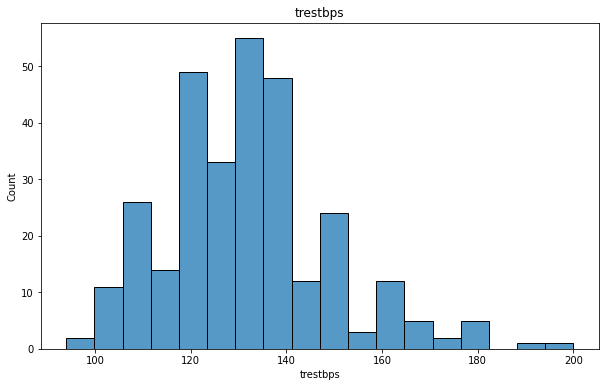

In [9]:
plt.figure(2, figsize=(10,6))
plt.title("age")
sns.histplot(df['age'])

plt.figure(3, figsize=(10,6)) 
plt.title("trestbps")
sns.histplot(df['trestbps'])

In [10]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df))
scaledColums.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
target = ["target"]
features = df.columns.drop(target)
train,test = train_test_split(df,test_size = 0.33)
xTrain = train[features]
yTrain = train[target]
xTest  = test[features]
yTest = test[target]

In [12]:
knnModel = KNeighborsClassifier(n_neighbors=5) 
knnModel.fit(xTrain,yTrain.values.ravel())


KNeighborsClassifier()

In [13]:
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)

0.63

In [14]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.66      0.48      0.55        48
           1       0.62      0.77      0.68        52

    accuracy                           0.63       100
   macro avg       0.64      0.62      0.62       100
weighted avg       0.64      0.63      0.62       100



<AxesSubplot:>

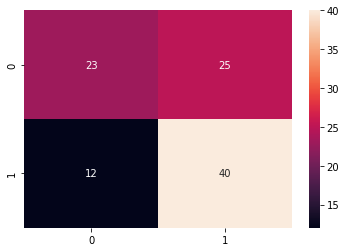

In [15]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [16]:
dTree = DecisionTreeClassifier(max_depth=4)
dTree.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=4)

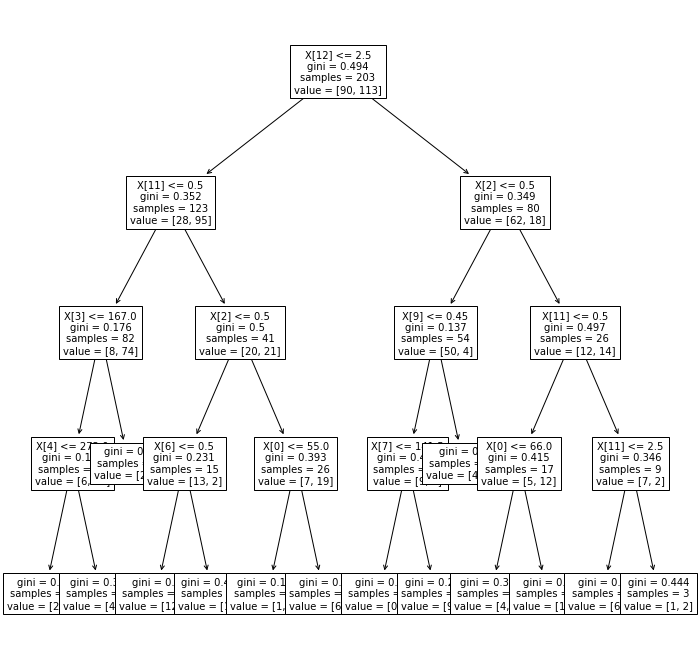

In [17]:
plt.figure(figsize=(12,12))
plot_tree(dTree, fontsize=10)
plt.show()

In [18]:
yPred = dTree.predict(xTest)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        48
           1       0.74      0.77      0.75        52

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



In [19]:
yPred= dTree.predict(xTest)
accuracy_score(yTest,yPred)

0.74

<AxesSubplot:>

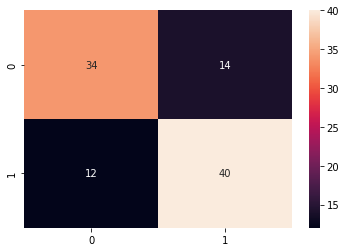

In [20]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [21]:
SVC_clsfr = SVC(C=1, gamma=1)
SVC_clsfr.fit(xTrain,yTrain.values.ravel())

SVC(C=1, gamma=1)

In [22]:
yPred= SVC_clsfr.predict(xTest)
accuracy_score(yTest,yPred)

0.52

In [23]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.52      1.00      0.68        52

    accuracy                           0.52       100
   macro avg       0.26      0.50      0.34       100
weighted avg       0.27      0.52      0.36       100



C:\Users\Kuki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kuki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kuki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<AxesSubplot:>

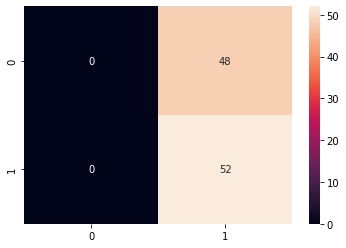

In [24]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [25]:
rForest = RandomForestClassifier(n_estimators = 200)
rForest.fit(xTrain,yTrain.values.ravel())

RandomForestClassifier(n_estimators=200)

In [26]:
yPred= rForest.predict(xTest)
accuracy_score(yTest,yPred)

0.85

In [27]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        48
           1       0.82      0.90      0.86        52

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



<AxesSubplot:>

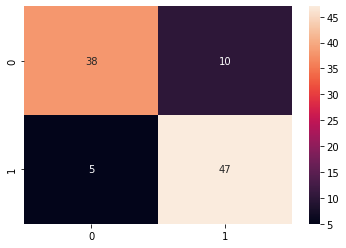

In [28]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [29]:
AdaB = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
AdaB.fit(xTrain,yTrain.values.ravel())

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [30]:
yPred= AdaB.predict(xTest)
accuracy_score(yTest,yPred)

0.78

In [31]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        48
           1       0.77      0.83      0.80        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



<AxesSubplot:>

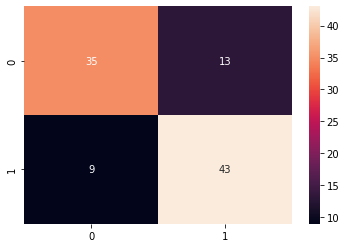

In [32]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [33]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
SVC_clsfr = SVC()
grid_search = GridSearchCV(SVC_clsfr, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [34]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is -0.07865612648221347
The best parameters are:
 SVC(C=100, gamma=0.0001)


In [37]:
param_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.001,0.01,0.1]}
AdaB = AdaBoostClassifier()
grid_search=GridSearchCV(AdaB, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True,n_jobs=1)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [38]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.3012296881862099
The best parameters are:
 AdaBoostClassifier(learning_rate=0.01, n_estimators=2000)


In [39]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'max_features': [1, 2, 3, 4]}
dTree = DecisionTreeClassifier()
grid_search=GridSearchCV(dTree, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [40]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.16060606060606059
The best parameters are:
 DecisionTreeClassifier(max_depth=4, max_features=4)


In [41]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'n_estimators': [50, 100, 150, 200]}
rForest = RandomForestClassifier()
grid_search=GridSearchCV(rForest, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [42]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.3396574440052701
The best parameters are:
 RandomForestClassifier(max_depth=4)


In [43]:
param_grid ={'n_neighbors': [2,3,4,8,11,20,25]}
knnModel = KNeighborsClassifier() 
grid_search=GridSearchCV(knnModel, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [44]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is -0.5769872639437856
The best parameters are:
 KNeighborsClassifier(n_neighbors=20)
